yt : [INFO     ] 2024-03-21 17:33:49,346 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-21 17:33:49,346 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-21 17:33:49,347 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-21 17:33:49,348 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-21 17:33:49,797 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-21 17:33:49,797 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-21 17:33:49,798 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-21 17:33:49,798 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]
yt : [INFO     ] 2024-03-21 17:33:50,175 xlim = 0.009393 0.011807
yt : [INFO     ] 2024-03-21 17:33:50,176 ylim = -0.000150 0.000150
yt : [I


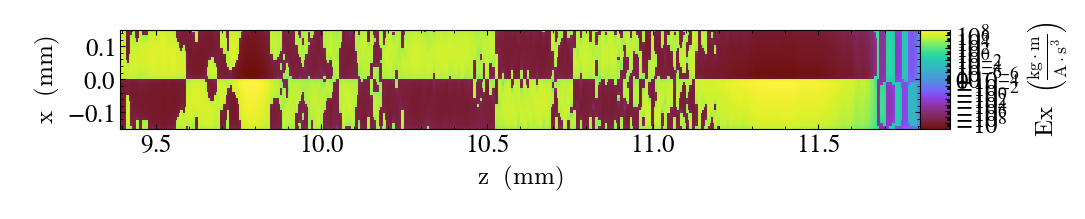

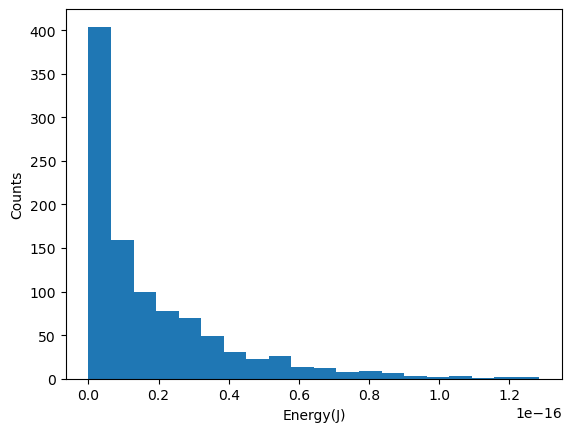

In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt


ds = yt.load('warpx/diags/diag1000000.old.8161300(1)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(1)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19

#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
plt.xlabel("Energy(J)")
plt.ylabel("Counts")
counts=plt.hist(Spectrum,20)




np.shape(Ex_array)

yt.SlicePlot( ds, 1, 'Ex', origin='native' )

1.2855443189001274e-16
1.5558293640074458e-49


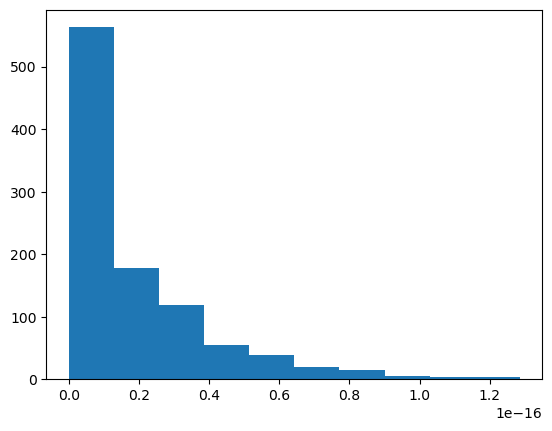

In [34]:

counts=plt.hist(Spectrum,10)
print(max(Spectrum))
print(min(Spectrum))
length=max(Spectrum)-min(Spectrum)

[0.00000000e+00 1.16867665e-17 2.33735331e-17 3.50602996e-17
 4.67470661e-17 5.84338327e-17 7.01205992e-17 8.18073657e-17
 9.34941323e-17 1.05180899e-16 1.16867665e-16]


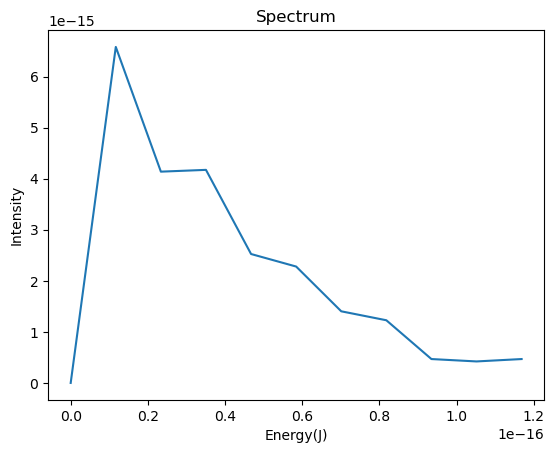

In [35]:
counts0=counts[0]
counts1=np.zeros(11)
counts1[0]=0
for k in range(10):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(11)
for k in range(11):
    Energyarr[k]=(length/11)*k
Intensity=counts1*Energyarr
print(Energyarr)
plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity")
plt.plot(Energyarr,Intensity)